<a href="https://colab.research.google.com/github/rafaelarc/analise_cinema/blob/main/analise_cinema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Título do Projeto: Análise de Dados de Filmes

**Descrição:**

Este projeto de análise de dados explorou um conjunto de dados contendo informações sobre filmes do cinema. O objetivo foi investigar diferentes aspectos relacionados aos filmes, como gêneros populares, maiores diretores, distribuição de pontuações (scores), relação entre orçamento e faturamento bruto, entre outros.

In [1]:
# importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importando o arquivo

df = pd.read_csv('movies.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# identificando o tipo de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# identificando se temos valores nulos nas colunas

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# função para substituir os valores nulos

def replace_null_values(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            mode_value = mode(dataframe[column]).mode[0]
            dataframe[column].fillna(mode_value, inplace=True)
        else:
            median_value = np.nanmedian(dataframe[column])
            dataframe[column].fillna(median_value, inplace=True)
    return dataframe

In [6]:
# confirmando se ainda existem valores nulos

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# criando um dataframe com apenas as colunas necessárias

cinema_filmes = df[['name','genre','year','votes','score','director','star','budget','gross','company']]
cinema_filmes.head()

,name,genre,year,votes,score,director,star,budget,gross,company
0,The Shining,Drama,1980,927000.0,8.4,Stanley Kubrick,Jack Nicholson,19000000.0,46998772.0,Warner Bros.
1,The Blue Lagoon,Adventure,1980,65000.0,5.8,Randal Kleiser,Brooke Shields,4500000.0,58853106.0,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,1200000.0,8.7,Irvin Kershner,Mark Hamill,18000000.0,538375067.0,Lucasfilm
3,Airplane!,Comedy,1980,221000.0,7.7,Jim Abrahams,Robert Hays,3500000.0,83453539.0,Paramount Pictures
4,Caddyshack,Comedy,1980,108000.0,7.3,Harold Ramis,Chevy Chase,6000000.0,39846344.0,Orion Pictures


# **Explorando os dados**

In [8]:
# identificando os estudios com mais filmes produzidos

cinema_filmes['company'].value_counts().head(5)

Universal Pictures       377
Warner Bros.             334
Columbia Pictures        332
Paramount Pictures       320
Twentieth Century Fox    240
Name: company, dtype: int64

In [9]:
# identificando o ano com menos filmes produzidos

cinema_filmes['year'].value_counts().tail(1)

2020    25
Name: year, dtype: int64

In [10]:
# qual o filme de maior orçamento

cinema_filmes.loc[cinema_filmes['budget'].idxmax()]

name        Avengers: Endgame
genre                  Action
year                     2019
votes                903000.0
score                     8.4
director        Anthony Russo
star        Robert Downey Jr.
budget            356000000.0
gross            2797501328.0
company        Marvel Studios
Name: 7445, dtype: object

In [11]:
# quais são os filmes mais bem avaliados

cinema_filmes.nlargest(10, 'score')

,name,genre,year,votes,score,director,star,budget,gross,company
2443,The Shawshank Redemption,Drama,1994,2400000.0,9.3,Frank Darabont,Tim Robbins,25000000.0,2.881729e+07,Castle Rock Entertainment
5243,The Dark Knight,Action,2008,2400000.0,9.0,Christopher Nolan,Christian Bale,185000000.0,1.005974e+09,Warner Bros.
2247,Schindler's List,Biography,1993,1200000.0,8.9,Steven Spielberg,Liam Neeson,22000000.0,3.221612e+08,Universal Pictures
2444,Pulp Fiction,Crime,1994,1900000.0,8.9,Quentin Tarantino,John Travolta,8000000.0,2.139288e+08,Miramax
4245,The Lord of the Rings: The Return of the King,Action,2003,1700000.0,8.9,Peter Jackson,Elijah Wood,94000000.0,1.146031e+09,New Line Cinema
2445,Forrest Gump,Drama,1994,1900000.0,8.8,Robert Zemeckis,Tom Hanks,55000000.0,6.782261e+08,Paramount Pictures
3444,Fight Club,Drama,1999,1900000.0,8.8,David Fincher,Brad Pitt,63000000.0,1.012097e+08,Fox 2000 Pictures
3845,The Lord of the Rings: The Fellowship of the Ring,Action,2001,1700000.0,8.8,Peter Jackson,Elijah Wood,93000000.0,8.976901e+08,New Line Cinema
5643,Inception,Action,2010,2100000.0,8.8,Christopher Nolan,Leonardo DiCaprio,160000000.0,8.368370e+08,Warner Bros.
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,1200000.0,8.7,Irvin Kershner,Mark Hamill,18000000.0,5.383751e+08,Lucasfilm


In [12]:
# quais são os gêneros de filmes mais produzidos

cinema_filmes['genre'].value_counts().head(10)

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Name: genre, dtype: int64

In [13]:
# qual o diretor que mais produziu filmes

cinema_filmes['director'].value_counts().nlargest(1)

Woody Allen    38
Name: director, dtype: int64

# Analisando os Dados

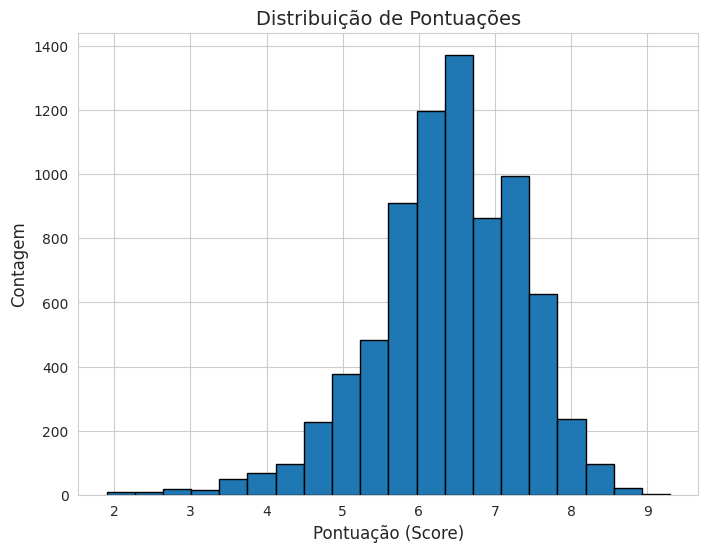

In [14]:
# análise de distribuição de pontuações (scores) para identificar se há uma concentração de filmes com pontuações específicas

plt.figure(figsize=(8, 6))
plt.hist(cinema_filmes['score'], bins=20, edgecolor='black')
plt.xlabel('Pontuação (Score)', size=12)
plt.ylabel('Contagem', size=12)
plt.title('Distribuição de Pontuações', size=14)
plt.show()

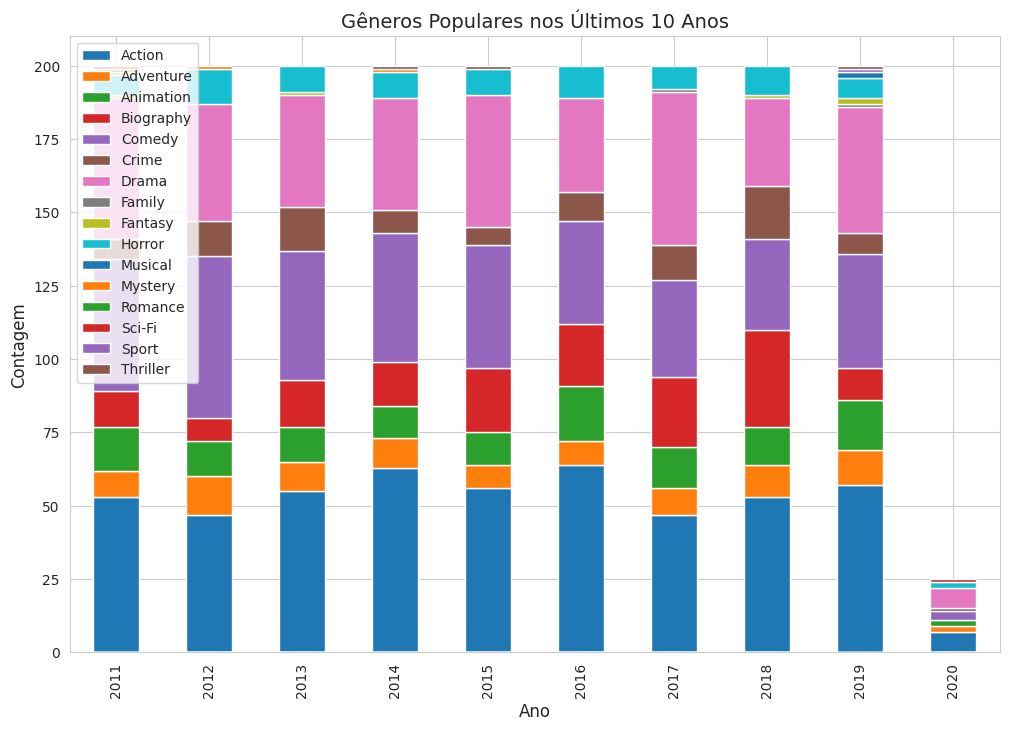

In [15]:
# filtrando apenas os últimos 10 anos
cinema_filmes_recentes = cinema_filmes[cinema_filmes['year'] >= (cinema_filmes['year'].max() - 9)]

# agrupar contagem de gêneros por ano
generos_por_ano = cinema_filmes_recentes.groupby(['year', 'genre']).size().unstack()

# plotar gráfico de barras empilhadas
generos_por_ano.plot(kind='bar', stacked=True, figsize=(12, 8))

# definir rótulos e título
plt.xlabel('Ano', size=12)
plt.ylabel('Contagem', size=12)
plt.title('Gêneros Populares nos Últimos 10 Anos', size=14)

# exibir legenda e mostrar gráfico
plt.legend(loc='upper left')
plt.show()

# Correlacionando variáveis

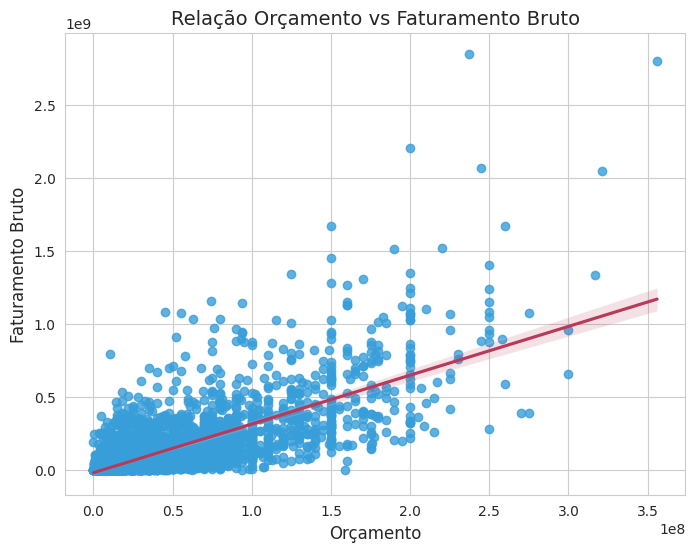

In [16]:
# criando um gráfico de dispersão com uma linha de regressão usando a biblioteca seaborn

plt.figure(figsize=(8, 6))
sns.regplot(data=cinema_filmes, x='budget', y='gross', color='#389ED9', line_kws={'color': '#B83959'})
plt.xlabel('Orçamento', size=12)
plt.ylabel('Faturamento Bruto', size=12)
plt.title('Relação Orçamento vs Faturamento Bruto', size=14)
plt.show()

In [17]:
# calculando a correlação entre as colunas

cinema_filmes.corr()

,year,votes,score,budget,gross
year,1.000000,0.222945,0.097995,0.329321,0.257486
votes,0.222945,1.000000,0.409182,0.442429,0.630757
score,0.097995,0.409182,1.000000,0.076254,0.186258
budget,0.329321,0.442429,0.076254,1.000000,0.740395
gross,0.257486,0.630757,0.186258,0.740395,1.000000


In [18]:
# criando a matriz de correlação

matrix = cinema_filmes.corr()

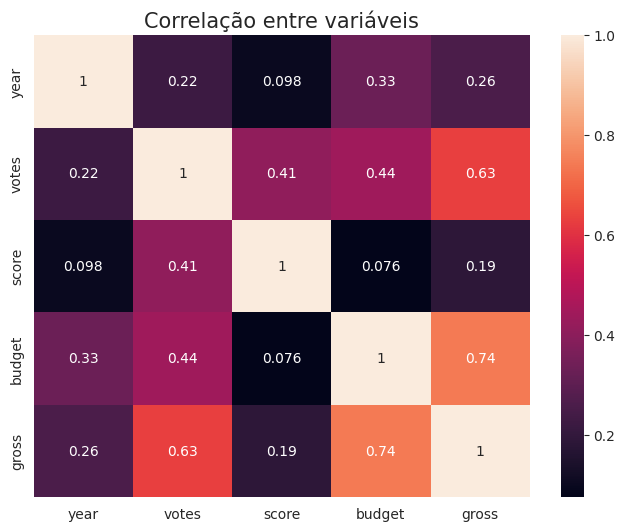

In [19]:
# criando um mapa de calor usando a biblioteca seaborn para visualizar matriz de correlação

plt.figure(figsize=(8,6))

sns.heatmap(matrix, annot=True)

plt.title('Correlação entre variáveis', size=15)

plt.show()